<a href="https://colab.research.google.com/github/polaroidz/polaroidz/blob/main/Regression_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
df <- read.csv("/content/slr06.csv")
df %>%
  summarize_all(mean)

X,Y
<dbl>,<dbl>
22.90476,98.1873


`geom_smooth()` using formula 'y ~ x'



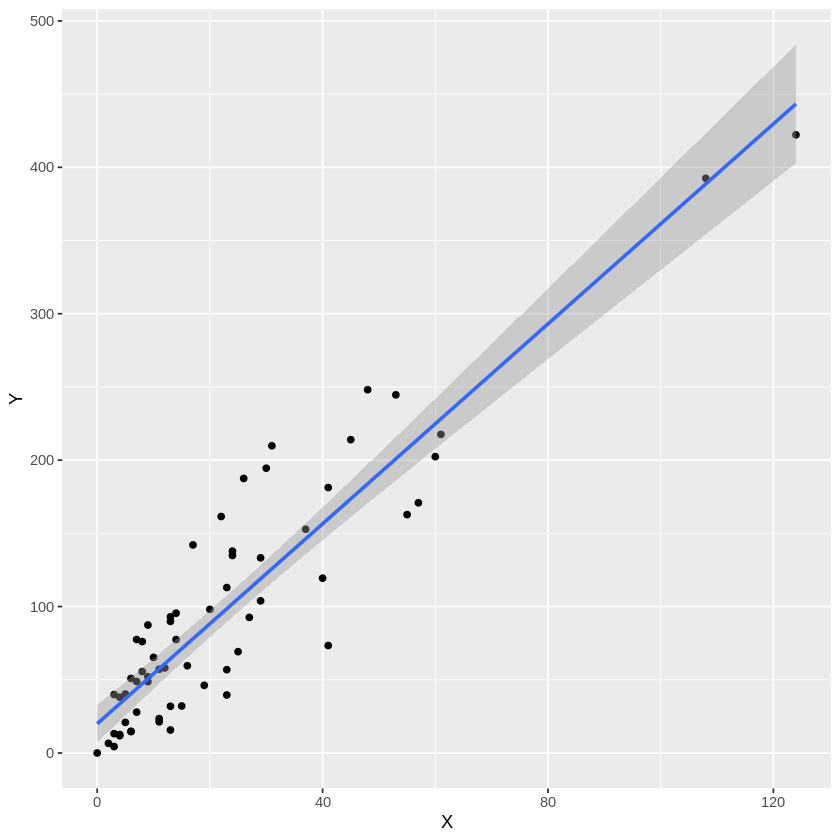

In [ ]:
ggplot(df, aes(X, Y)) +
  geom_point() + 
  geom_smooth(method = "lm", se = TRUE)

In [ ]:
model <- lm(Y ~ X, data = df)

In [ ]:
aux <- tibble(X = 20:40)

In [ ]:
predict(model, aux)

1         2         3         4         5         6         7         8 
 88.27096  91.68478  95.09860  98.51243 101.92625 105.34007 108.75390 112.16772 
        9        10        11        12        13        14        15        16 
115.58155 118.99537 122.40919 125.82302 129.23684 132.65066 136.06449 139.47831 
       17        18        19        20        21 
142.89213 146.30596 149.71978 153.13360 156.54743

In [ ]:
pred <- aux %>%
  mutate(Y = predict(model, aux))

`geom_smooth()` using formula 'y ~ x'



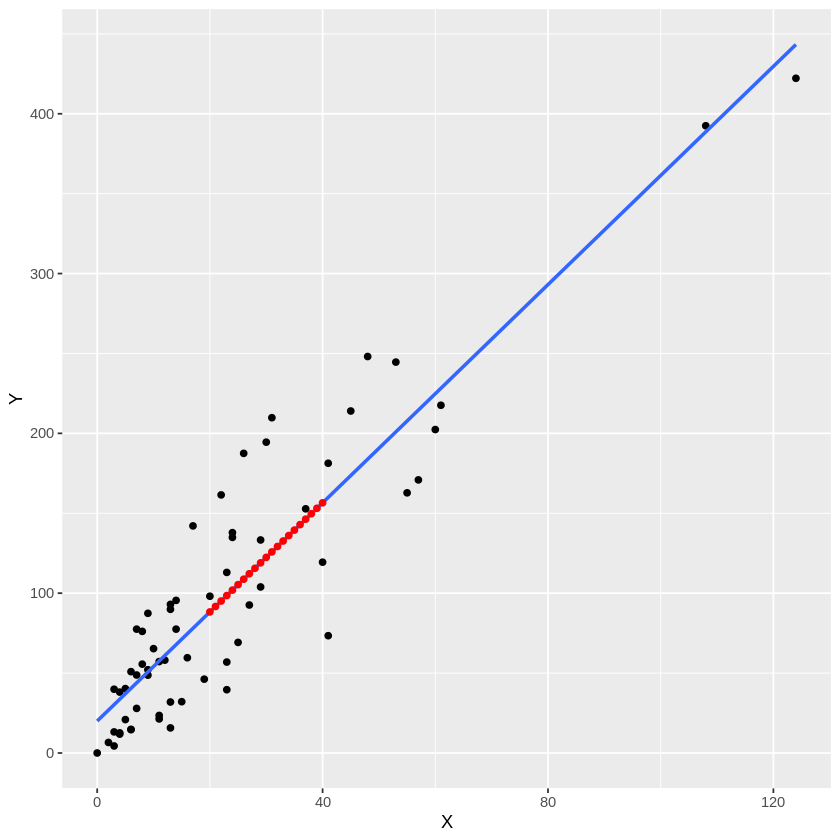

In [ ]:
ggplot(df, aes(X, Y)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  geom_point(
    data = pred,
    color = "red"
  )

In [ ]:
model


Call:
lm(formula = Y ~ X, data = df)

Coefficients:
(Intercept)            X  
     19.994        3.414  


In [ ]:
coefficients(model)

(Intercept)           X 
  19.994486    3.413824

In [ ]:
coef <- coefficients(model)

coef[1]

(Intercept) 
   19.99449

In [ ]:
fitted(model)

1         2         3         4         5         6         7         8 
388.68743  84.85713  64.37419 443.30861 156.54743 214.58243  98.51243  67.78802 
        9        10        11        12        13        14        15        16 
173.61655  54.13272  37.06360 183.85802  57.54654  98.51243  43.89125  26.82213 
       17        18        19        20        21        22        23        24 
101.92625  40.47743  30.23596  98.51243  40.47743  50.71890  50.71890  30.23596 
       25        26        27        28        29        30        31        32 
118.99537  43.89125  33.64978  88.27096  43.89125  33.64978  19.99449 105.34007 
       33        34        35        36        37        38        39        40 
 40.47743  37.06360  95.09860  57.54654 228.23772  60.96037  33.64978  74.61566 
       41        42        43        44        45        46        47        48 
 64.37419 224.82390 159.96125 146.30596 207.75478 159.96125  57.54654 112.16772 
       49        50        51        52        53        54        55        56 
 47.30507  30.23596  78.02949  64.37419  64.37419  71.20184  47.30507 118.99537 
       57        58        59        60        61        62        63 
122.40919 101.92625  50.71890 125.82302  67.78802 200.92713 108.75390

In [ ]:
residuals(model)

1           2           3           4           5           6 
  3.8125698 -38.6571334 -48.6741920 -21.1086072 -37.1474282 -43.6824287 
          7           8           9          10          11          12 
-41.6124276   9.7119844  40.3834540  11.1672786 -16.1636036  64.2419834 
         13          14          15          16          17          18 
-34.0465449 -58.9124276   4.9087493 -20.2221329  32.9737488  10.4225729 
         19          20          21          22          23          24 
-25.8359564  14.4875724 -25.6774271  -2.0188978   1.3811022 -17.0359564 
         25          26          27          28          29          30 
-15.0953690  33.6087493 -21.8497800   9.8290430 -15.9912507   4.4502200 
         31          32          33          34          35          36 
-19.9944858 -36.1400748 -25.8774271   3.2363964  66.4013959  -0.3465449 
         37          38          39          40          41          42 
-10.6377229  -2.8603685 -21.0497800 -15.0156627  25.5258080 -22.4238994 
         43          44          45          46          47          48 
 21.3387483   6.4940425 -44.9547816 -86.5612517 -36.2465449 -19.5677219 
         49          50          51          52          53          54 
 28.7949258   9.6640436  64.0705137  28.6258080 -32.4741920 -39.1018392 
         55          56          57          58          59          60 
  8.2949258  14.3046310  72.0908074  35.9737488  36.6811022  83.9769839 
         61          62          63 
 27.7119844  43.6728656  78.7461017

In [ ]:
df$Y - fitted(model) # = residuals

1           2           3           4           5           6 
  3.8125698 -38.6571334 -48.6741920 -21.1086072 -37.1474282 -43.6824287 
          7           8           9          10          11          12 
-41.6124276   9.7119844  40.3834540  11.1672786 -16.1636036  64.2419834 
         13          14          15          16          17          18 
-34.0465449 -58.9124276   4.9087493 -20.2221329  32.9737488  10.4225729 
         19          20          21          22          23          24 
-25.8359564  14.4875724 -25.6774271  -2.0188978   1.3811022 -17.0359564 
         25          26          27          28          29          30 
-15.0953690  33.6087493 -21.8497800   9.8290430 -15.9912507   4.4502200 
         31          32          33          34          35          36 
-19.9944858 -36.1400748 -25.8774271   3.2363964  66.4013959  -0.3465449 
         37          38          39          40          41          42 
-10.6377229  -2.8603685 -21.0497800 -15.0156627  25.5258080 -22.4238994 
         43          44          45          46          47          48 
 21.3387483   6.4940425 -44.9547816 -86.5612517 -36.2465449 -19.5677219 
         49          50          51          52          53          54 
 28.7949258   9.6640436  64.0705137  28.6258080 -32.4741920 -39.1018392 
         55          56          57          58          59          60 
  8.2949258  14.3046310  72.0908074  35.9737488  36.6811022  83.9769839 
         61          62          63 
 27.7119844  43.6728656  78.7461017

In [ ]:
summary(model)


Call:
lm(formula = Y ~ X, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.561 -24.051  -0.347  23.432  83.977 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.9945     6.3678    3.14   0.0026 ** 
X             3.4138     0.1955   17.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35.94 on 61 degrees of freedom
Multiple R-squared:  0.8333,	Adjusted R-squared:  0.8306 
F-statistic:   305 on 1 and 61 DF,  p-value: < 2.2e-16


In [2]:
library(broom)

#tidy(model)

In [ ]:
head(augment(model))

Y,X,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
392.5,108,388.68743,3.81257,0.23004994,36.23485,0.002183354,0.1208919
46.2,19,84.85713,-38.65713,0.01632399,35.88815,0.009758274,-1.0844621
15.7,13,64.37419,-48.67419,0.01877470,35.67965,0.017882352,-1.3671783
422.2,124,443.30861,-21.10861,0.31816287,36.08861,0.118031774,-0.7112627
119.4,40,156.54743,-37.14743,0.02451697,35.91242,0.013761838,-1.0464770
170.9,57,214.58243,-43.68243,0.05025648,35.77420,0.041151391,-1.2471377


In [ ]:
glance(model)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.8333467,0.8306147,35.94092,305.0293,2.046638e-25,1,-314.0351,634.0703,640.4997,78796.74,61,63


In [4]:
install.packages("ggfortify")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




In [5]:
library(ggfortify)

Warning message:
“`arrange_()` was deprecated in dplyr 0.7.0.
Please use `arrange()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


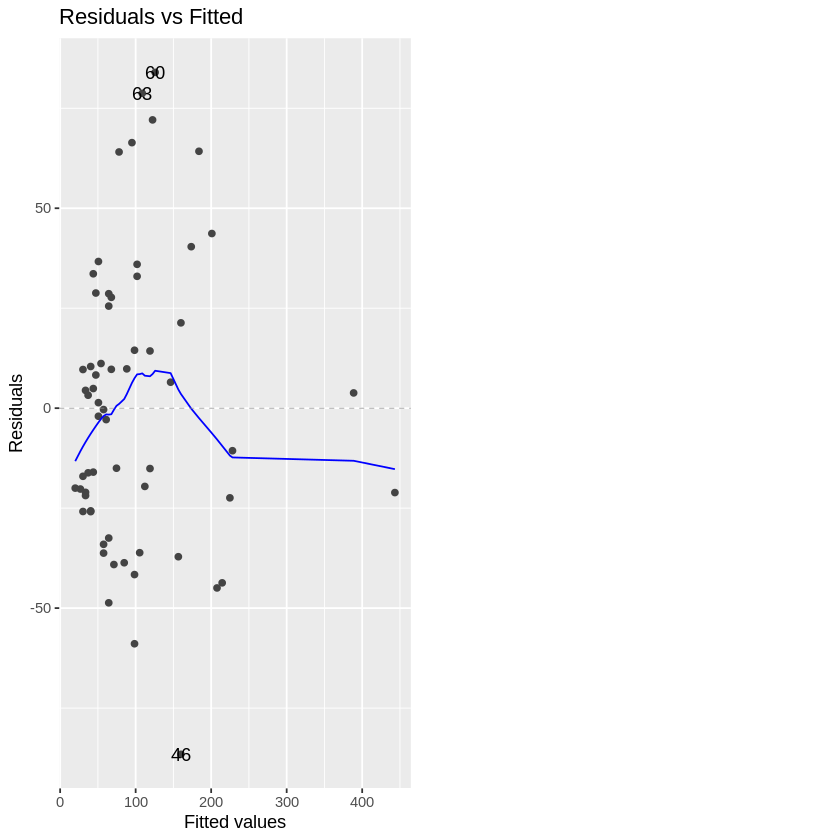

In [ ]:
# 1 - residuals vs. fitted values
# 2 - q-q plot
# 3 - scale-location

autoplot(model, which=1)

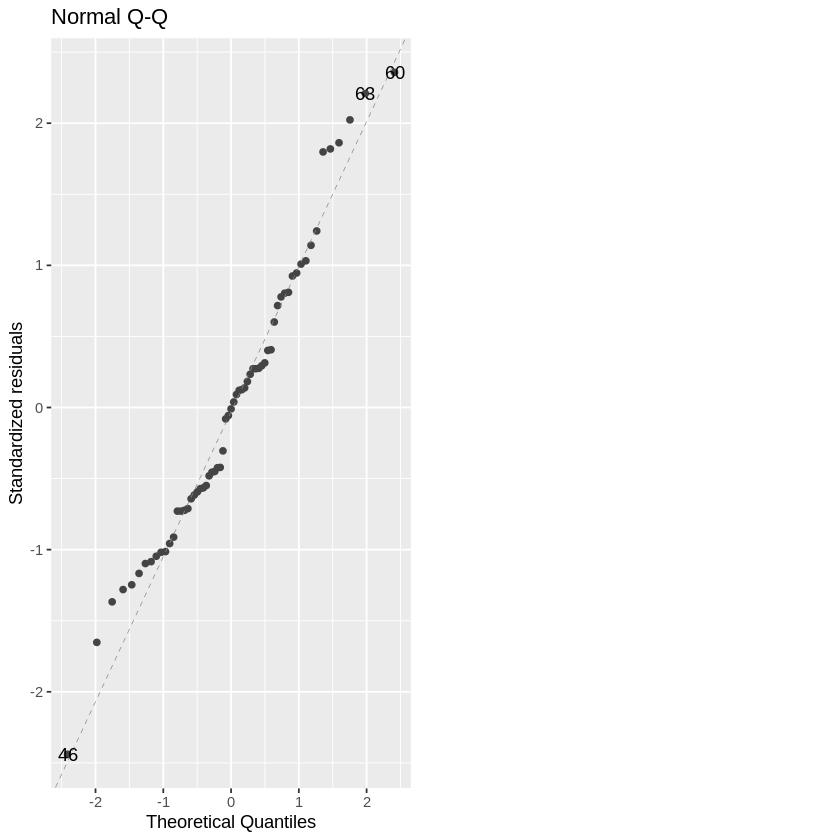

In [ ]:
autoplot(model, which = 2)

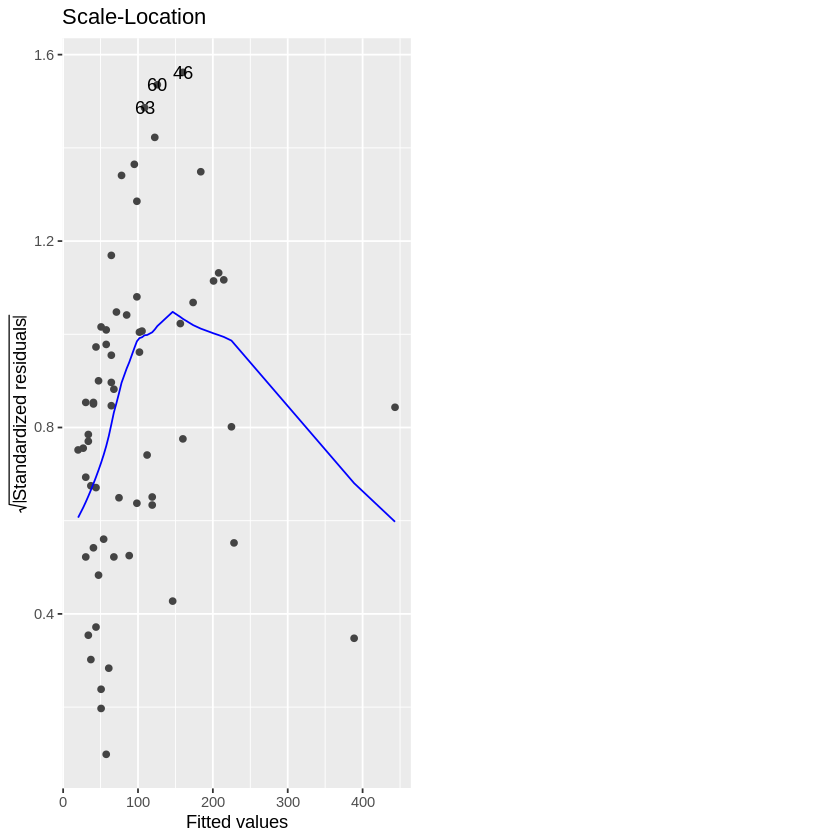

In [ ]:
autoplot(model, which = 3)

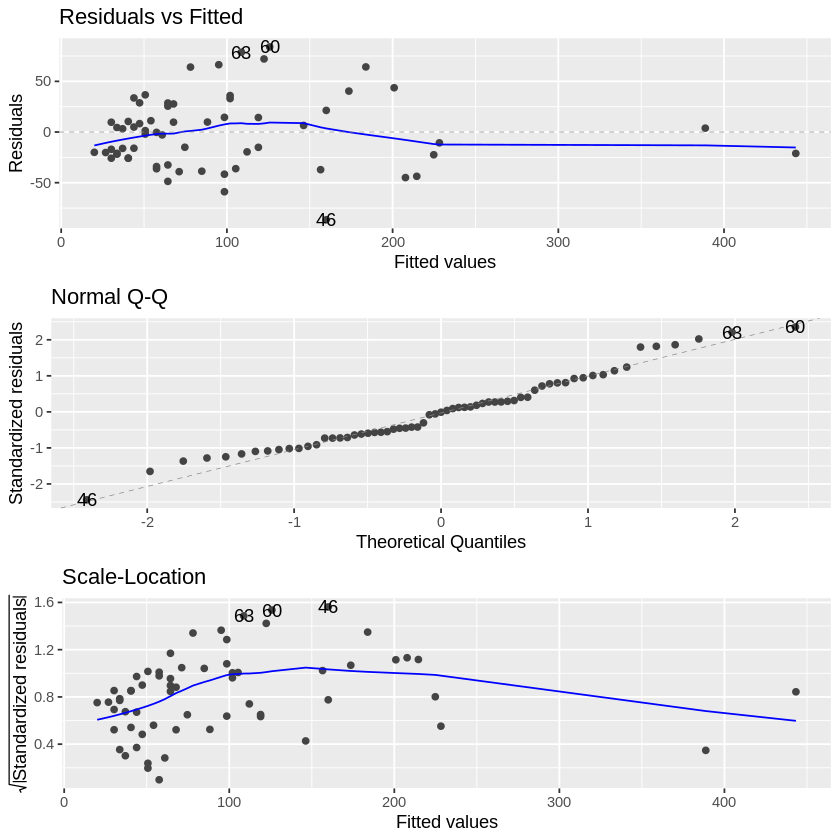

In [ ]:
autoplot(model, which = 1:3, nrow = 3, ncol = 1)

In [ ]:
hatvalues(model)

1          2          3          4          5          6          7 
0.23004994 0.01632399 0.01877470 0.31816287 0.02451697 0.05025648 0.01587328 
         8          9         10         11         12         13         14 
0.01821836 0.03031276 0.02079865 0.02535500 0.03450010 0.02006485 0.01587328 
        15         16         17         18         19         20         21 
0.02335500 0.02879867 0.01590850 0.02432542 0.02759163 0.01587328 0.02432542 
        22         23         24         25         26         27         28 
0.02159161 0.02159161 0.02759163 0.01697188 0.02335500 0.02644374 0.01612258 
        29         30         31         32         33         34         35 
0.02335500 0.02644374 0.03139023 0.01600286 0.02432542 0.02535500 0.01589723 
        36         37         38         39         40         41         42 
0.02006485 0.05879735 0.01939020 0.02644374 0.01728315 0.01877470 0.05657340 
        43         44         45         46         47         48         49 
0.02555782 0.02174936 0.04634098 0.02555782 0.02006485 0.01636906 0.02244373 
        50         51         52         53         54         55         56 
0.02759163 0.01690427 0.01877470 0.01877470 0.01772118 0.02244373 0.01697188 
        57         58         59         60         61         62         63 
0.01736202 0.01590850 0.02159161 0.01781132 0.01821836 0.04266209 0.01615638

In [ ]:
# most extreme values
model %>%
  augment() %>%
  select(X, Y, leverage = .hat) %>%
  arrange(desc(leverage)) %>%
  head()

X,Y,leverage
<int>,<dbl>,<dbl>
124,422.2,0.31816287
108,392.5,0.23004994
61,217.6,0.05879735
60,202.4,0.05657340
57,170.9,0.05025648
55,162.8,0.04634098


In [ ]:
cooks.distance(model)

1            2            3            4            5            6 
2.183354e-03 9.758274e-03 1.788235e-02 1.180318e-01 1.376184e-02 4.115139e-02 
           7            8            9           10           11           12 
1.098506e-02 6.900603e-04 2.034982e-02 1.047074e-03 2.699222e-03 5.912148e-02 
          13           14           15           16           17           18 
9.375163e-03 2.201761e-02 2.283703e-04 4.832807e-03 6.913315e-03 1.074464e-03 
          19           20           21           22           23           24 
7.539119e-03 1.331520e-03 6.521462e-03 3.558483e-05 1.665282e-05 3.277967e-03 
          25           26           27           28           29           30 
1.549092e-03 1.070539e-02 5.155686e-03 6.228258e-04 2.423610e-03 2.138727e-04 
          31           32           33           34           35           36 
5.177366e-03 8.355639e-03 6.623448e-03 1.082146e-04 2.801473e-02 9.712964e-07 
          37           38           39           40           41           42 
2.907237e-03 6.385946e-05 4.785060e-03 1.561876e-03 4.917973e-03 1.237114e-02 
          43           44           45           46           47           48 
4.743961e-03 3.709949e-04 3.985862e-02 7.806390e-02 1.062591e-02 2.507445e-03 
          49           50           51           52           53           54 
7.537632e-03 1.054847e-03 2.779156e-02 6.185042e-03 7.959831e-03 1.086948e-02 
          55           56           57           58           59           60 
6.255010e-04 1.391051e-03 3.617134e-02 8.228508e-03 1.174684e-02 5.039858e-02 
          61           62           63 
5.618318e-03 3.436581e-02 4.006284e-02

In [ ]:
# most influentials
model %>%
  augment() %>%
  select(X, Y, cooks_distance = .cooksd) %>%
  arrange(desc(cooks_distance)) %>%
  head()

X,Y,cooks_distance
<int>,<dbl>,<dbl>
124,422.2,0.11803177
41,73.4,0.07806390
48,248.1,0.05912148
31,209.8,0.05039858
57,170.9,0.04115139
26,187.5,0.04006284


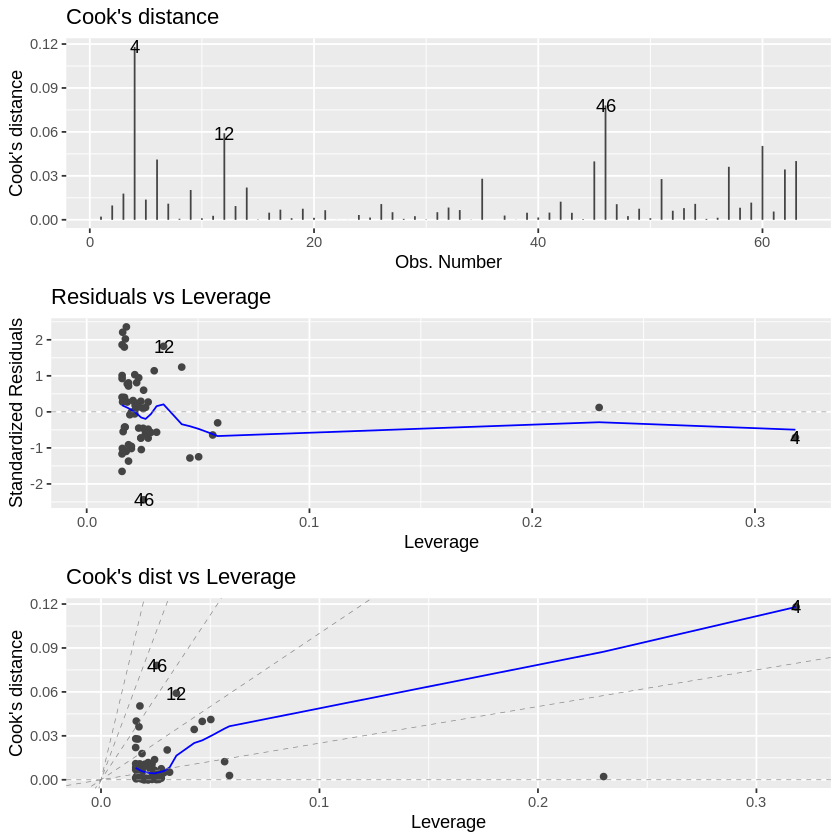

In [ ]:
autoplot(model, which = 4:6, nrow = 3, ncol = 1)

In [6]:
data(iris)

head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [10]:
iris$is_setosa <- as.integer(iris$Species == "setosa")

head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_setosa
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1
6,5.4,3.9,1.7,0.4,setosa,1


In [20]:
mdl_iris <- glm(
  is_setosa ~ Sepal.Length, data = iris, family = "binomial"
)

In [21]:
mdl_iris


Call:  glm(formula = is_setosa ~ Sepal.Length, family = "binomial", 
    data = iris)

Coefficients:
 (Intercept)  Sepal.Length  
      27.829        -5.176  

Degrees of Freedom: 149 Total (i.e. Null);  148 Residual
Null Deviance:	    191 
Residual Deviance: 71.84 	AIC: 75.84

In [28]:
prediction_data <- iris %>%
  mutate(
    is_setosa = predict(mdl_iris, iris, type = "response"),
    is_setosa_pred = round(is_setosa),
    odds_ratio = is_setosa / (1 - is_setosa)
  )

head(prediction_data)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_setosa,is_setosa_pred,odds_ratio
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2,setosa,0.8072845,1,4.1889954
2,4.9,3.0,1.4,0.2,setosa,0.9218391,1,11.7941138
3,4.7,3.2,1.3,0.2,setosa,0.9707656,1,33.2063195
4,4.6,3.1,1.5,0.2,setosa,0.9823690,1,55.7183767
5,5.0,3.6,1.4,0.2,setosa,0.8754500,1,7.0289038
6,5.4,3.9,1.7,0.4,setosa,0.4699741,0,0.8867001


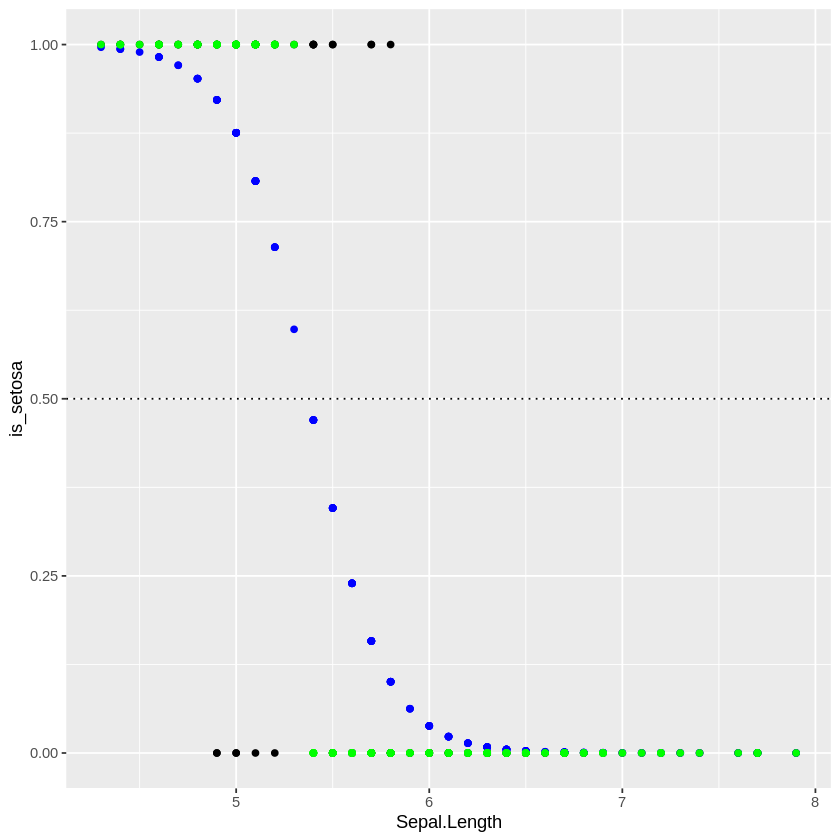

In [29]:
ggplot(iris, aes(x = Sepal.Length, y = is_setosa)) +
  geom_point() +
  geom_point(
    data = prediction_data,
    color = "blue"
  ) +
  geom_point(
    aes(y = is_setosa_pred),
    data = prediction_data,
    color = "green"
  ) +
  geom_hline(
    yintercept = 0.5,
    linetype = "dotted"
  )

In [34]:
actual <- iris$is_setosa
pred <- prediction_data$is_setosa_pred

outcomes <- table(pred, actual)

outcomes

    actual
pred  0  1
   0 94 10
   1  6 40

In [33]:
library(yardstick)

For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.



In [32]:
install.packages("yardstick")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘pROC’




In [35]:
confusion <- conf_mat(outcomes)

confusion

    actual
pred  0  1
   0 94 10
   1  6 40

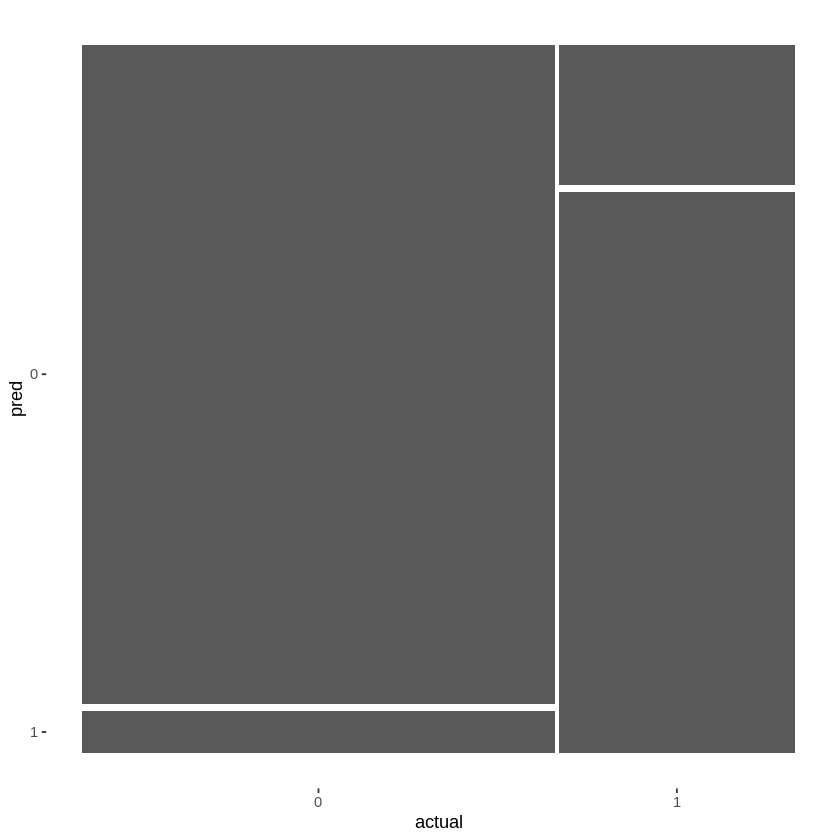

In [36]:
autoplot(confusion)

In [37]:
summary(confusion, event_level = "second")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8933333
kap,binary,0.7551020
sens,binary,0.8000000
spec,binary,0.9400000
ppv,binary,0.8695652
npv,binary,0.9038462
mcc,binary,0.7565213
j_index,binary,0.7400000
bal_accuracy,binary,0.8700000
